In [194]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from skimage import transform
from skimage import exposure
from skimage import io
from sklearn.utils import shuffle

np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

In [195]:
# Store data, labels in the list
cur_path = "traffic_dataset"
data = []
labels = []
num_classes = len(os.listdir(cur_path + "\Train"))
print(num_classes)

43


In [196]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

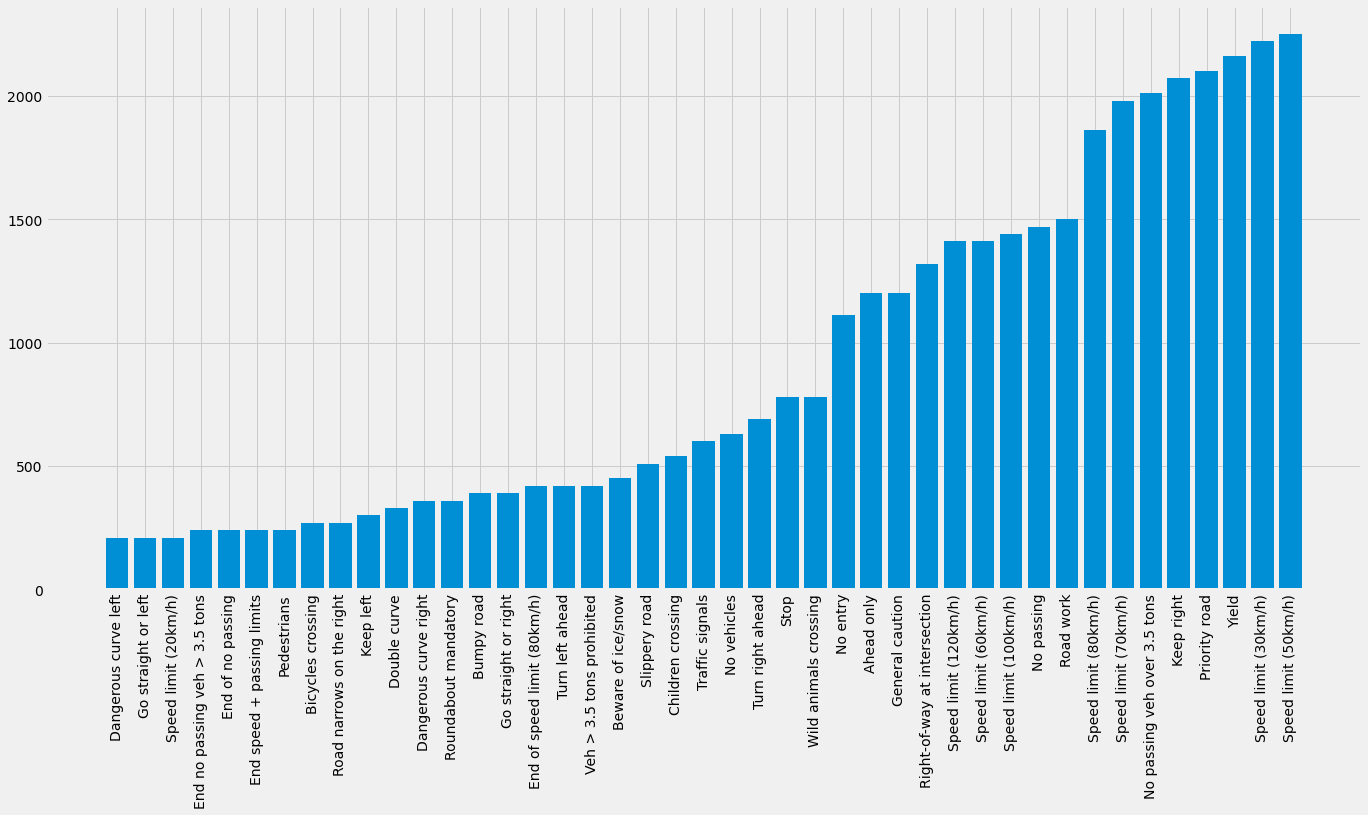

In [197]:
folders = os.listdir(cur_path + "\Train")

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(cur_path + "\Train" + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

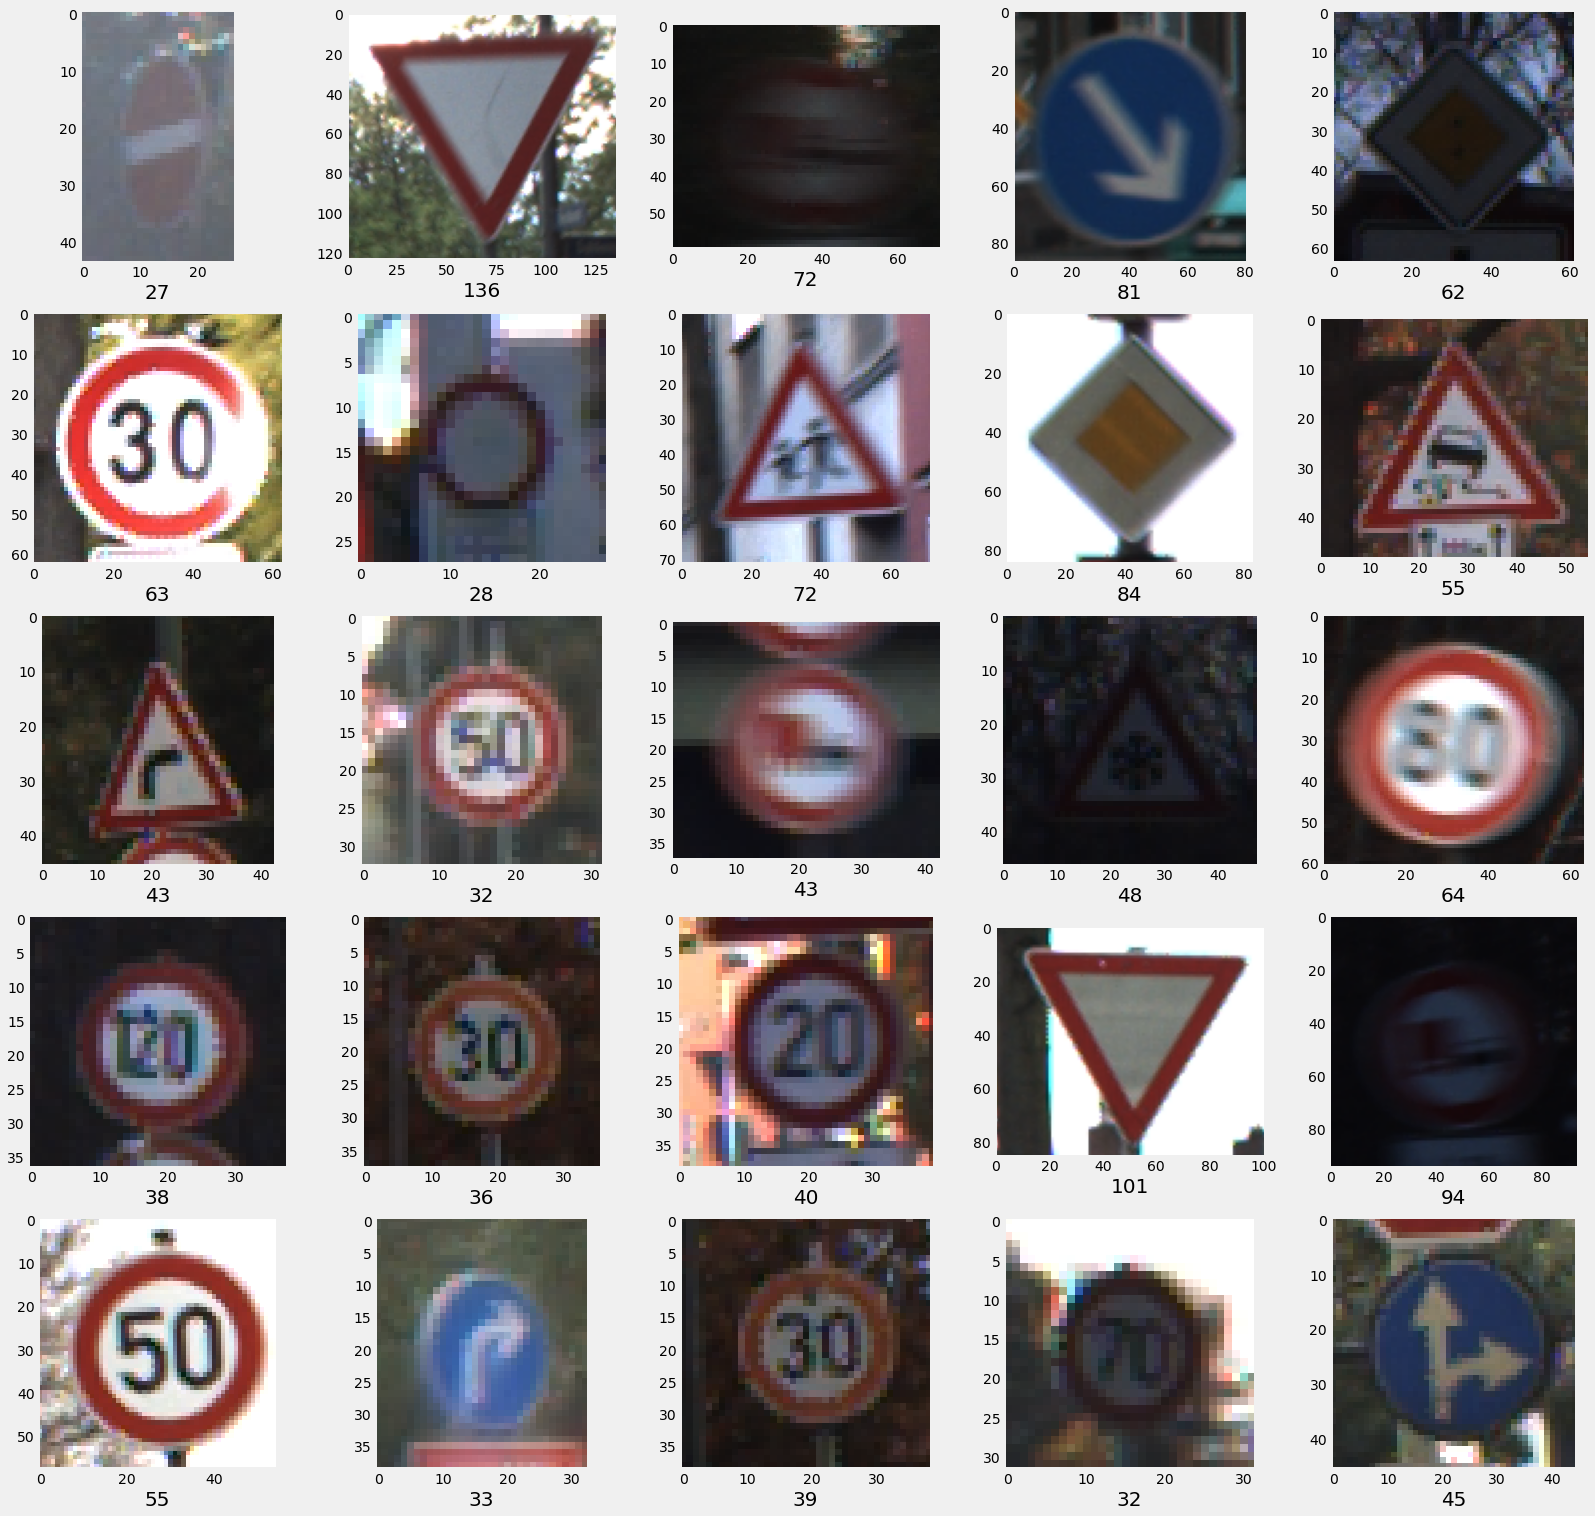

In [198]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(cur_path + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = cur_path + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
  

In [199]:
# Retrieving the images and their labels 
for i in range(num_classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
# Preprocess the images
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            

In [200]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 32, 32, 3) (39209,)


In [201]:
#Shuffling the training data
shuffle_indexes = np.arange(data.shape[0])
np.random.shuffle(shuffle_indexes)
data = data[shuffle_indexes]
labels = labels[shuffle_indexes]

In [202]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [203]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [204]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [205]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 conv2d_49 (Conv2D)          (None, 24, 24, 6)         906       
                                                                 
 batch_normalization_36 (Bat  (None, 24, 24, 6)        24        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 10, 10, 16)        880       
                                                                 
 conv2d_51 (Conv2D)          (None, 8, 8, 16)        

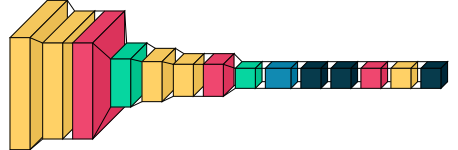

In [206]:
import visualkeras
visualkeras.layered_view(model)

In [207]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 13s 13ms/step - loss: 1.3812 - accuracy: 0.6375 - val_loss: 0.2911 - val_accuracy: 0.9146
Epoch 2/10
981/981 [==============================] - 13s 13ms/step - loss: 0.2820 - accuracy: 0.9223 - val_loss: 0.1284 - val_accuracy: 0.9647
Epoch 3/10
981/981 [==============================] - 13s 13ms/step - loss: 0.1388 - accuracy: 0.9628 - val_loss: 0.0797 - val_accuracy: 0.9782
Epoch 4/10
981/981 [==============================] - 12s 13ms/step - loss: 0.0911 - accuracy: 0.9746 - val_loss: 0.0668 - val_accuracy: 0.9807
Epoch 5/10
981/981 [==============================] - 12s 13ms/step - loss: 0.0816 - accuracy: 0.9773 - val_loss: 0.0684 - val_accuracy: 0.9800
Epoch 6/10
981/981 [==============================] - 12s 13ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.0533 - val_accuracy: 0.9832
Epoch 7/10
981/981 [==============================] - 12s 13ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0400 - val_accuracy:

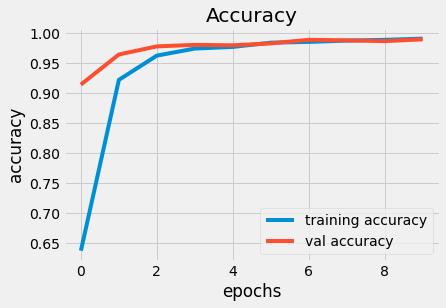

In [208]:
# Plotting graphs for Accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

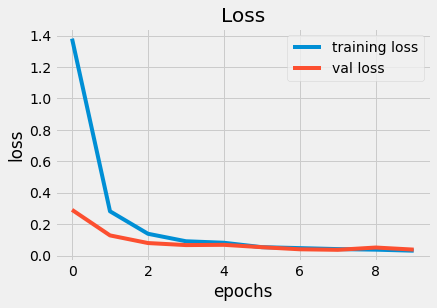

In [209]:
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [210]:
# Testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv("traffic_dataset\Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [211]:
for img in imgs:
    image = Image.open(cur_path + '\\'+ img)
    image = image.resize((32,32))
    data.append(np.array(image))
    
X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

In [212]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9501187648456056


In [213]:
model.save('traffic_classifier_main_model.h5')